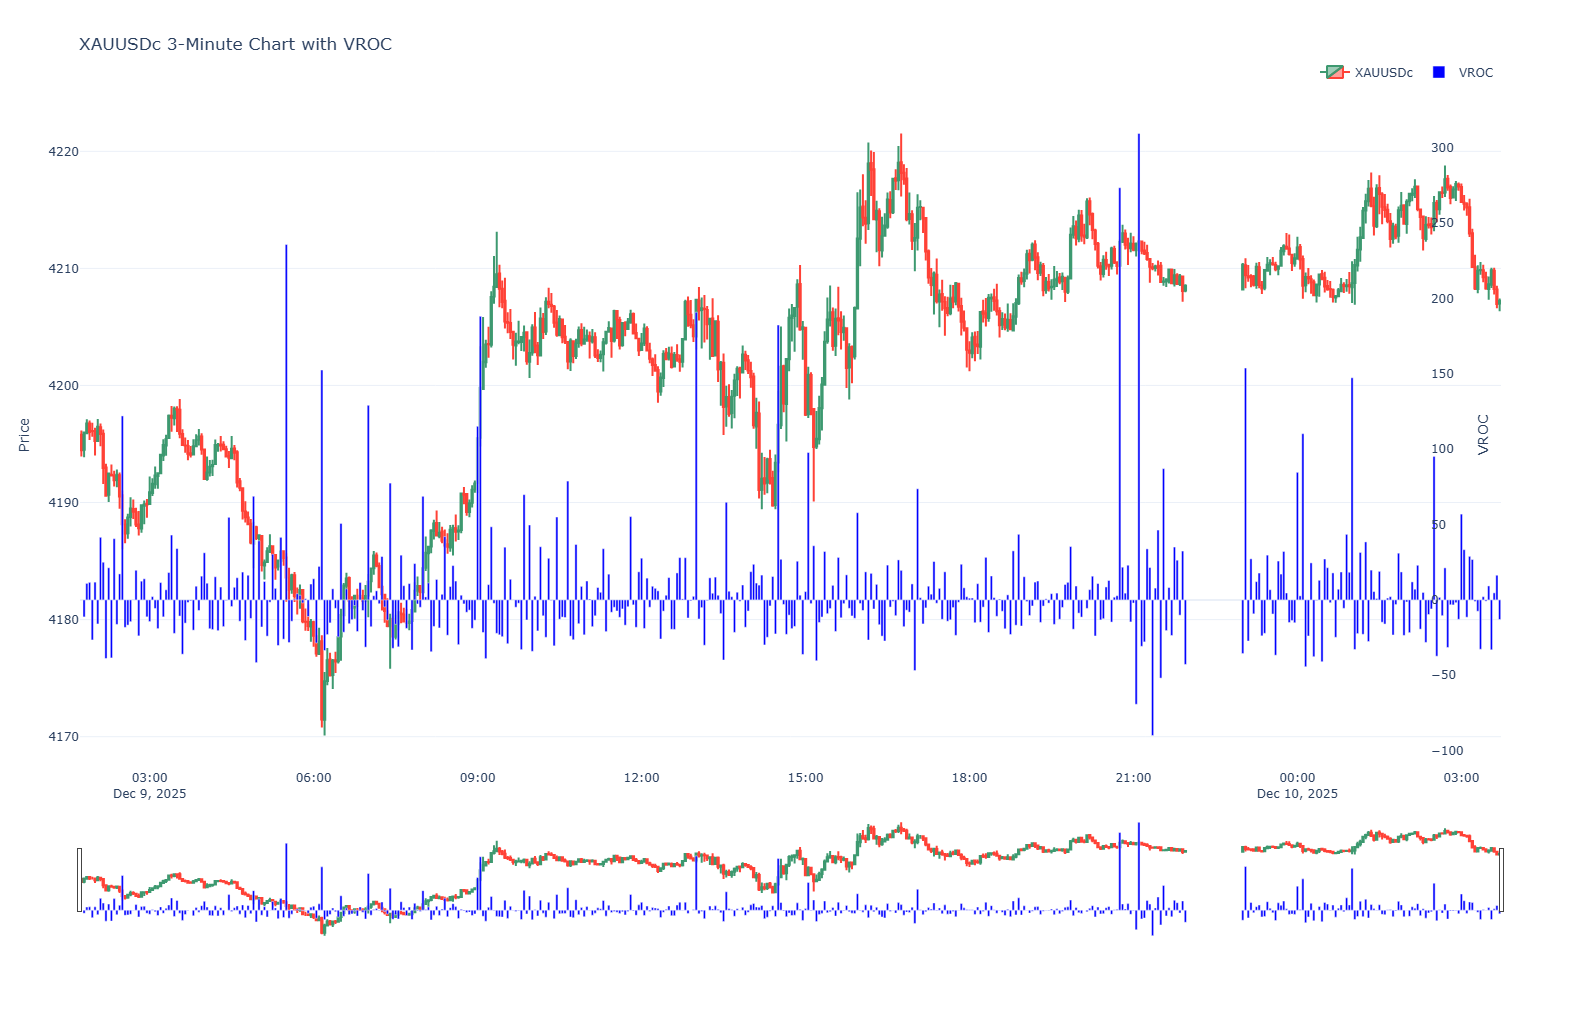

In [7]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()
    quit()

# -------------------------
# 2. Fetch 3-minute XAUUSDc data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
bars = 500  # number of bars to fetch

utc_from = datetime.now() - timedelta(minutes=bars*3)
rates = mt5.copy_rates_from(symbol, timeframe, utc_from, bars)

# Shutdown MT5 connection
mt5.shutdown()

# -------------------------
# 3. Prepare DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')

# -------------------------
# 4. Calculate VROC
# -------------------------
# Volume Rate of Change: VROC = (Volume_now - Volume_n_periods_ago) / Volume_n_periods_ago * 100
vroc_period = 1
df['VROC'] = df['tick_volume'].pct_change(periods=vroc_period) * 100

# -------------------------
# 5. Plotly chart
# -------------------------
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc'
))

# VROC in separate pane
fig.add_trace(go.Bar(
    x=df['time'],
    y=df['VROC'],
    name='VROC',
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    template='plotly_white',
    width=2500,
    height=1000,
    title=f'XAUUSDc 3-Minute Chart with VROC',
    xaxis=dict(domain=[0, 1]),
    yaxis=dict(title='Price'),
    yaxis2=dict(title='VROC', overlaying='y', side='right', showgrid=False, position=0.95),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()


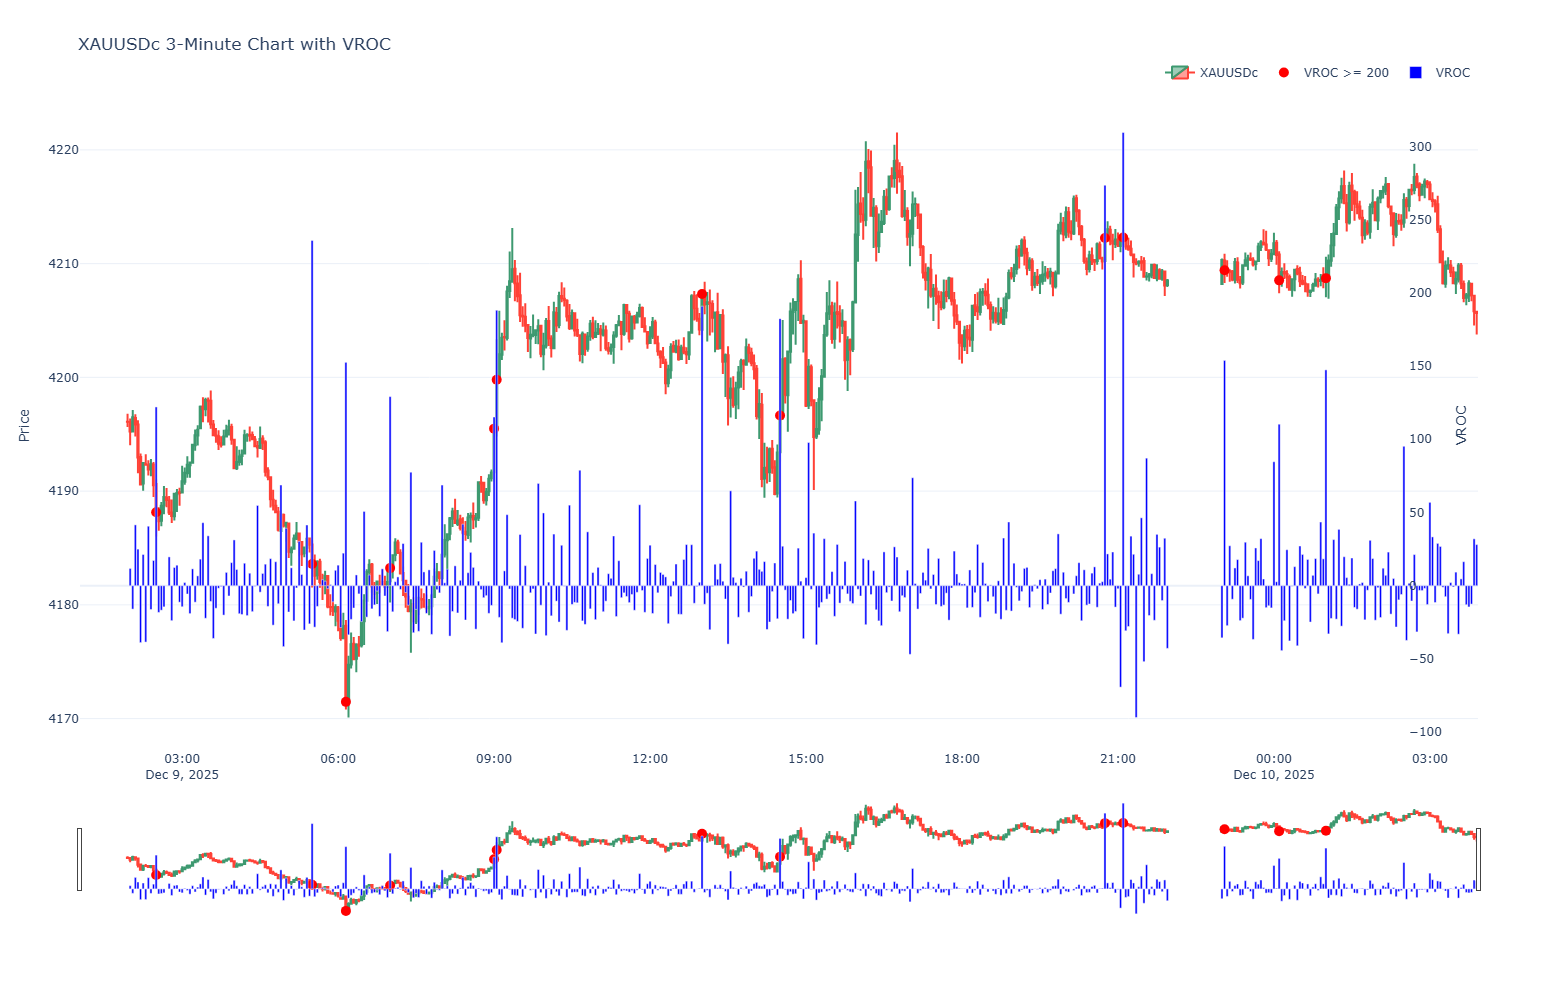

In [23]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()
    quit()

# -------------------------
# 2. Fetch 3-minute XAUUSDc data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
bars = 500  # number of bars to fetch

utc_from = datetime.now() - timedelta(minutes=bars*3)
rates = mt5.copy_rates_from(symbol, timeframe, utc_from, bars)

# Shutdown MT5 connection
mt5.shutdown()

# -------------------------
# 3. Prepare DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')

# -------------------------
# 4. Calculate VROC
# -------------------------
vroc_period = 1
df['VROC'] = df['tick_volume'].pct_change(periods=vroc_period) * 100

# -------------------------
# 5. Identify high VROC bars
# -------------------------
vroc_threshold = 100
df['VROC_signal'] = df['VROC'] >= vroc_threshold

# -------------------------
# 6. Plotly chart
# -------------------------
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc'
))

# Mark candlestick closes where VROC >= 100
fig.add_trace(go.Scatter(
    x=df.loc[df['VROC_signal'], 'time'],
    y=df.loc[df['VROC_signal'], 'close'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='VROC >= 200'
))

# VROC in separate pane
fig.add_trace(go.Bar(
    x=df['time'],
    y=df['VROC'],
    name='VROC',
    marker_color='blue',
    yaxis='y2'
))

# Layout
fig.update_layout(
    template='plotly_white',
    width=1400,
    height=1000,
    title=f'XAUUSDc 3-Minute Chart with VROC',
    xaxis=dict(domain=[0, 1]),
    yaxis=dict(title='Price'),
    yaxis2=dict(title='VROC', overlaying='y', side='right', showgrid=False, position=0.95),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()


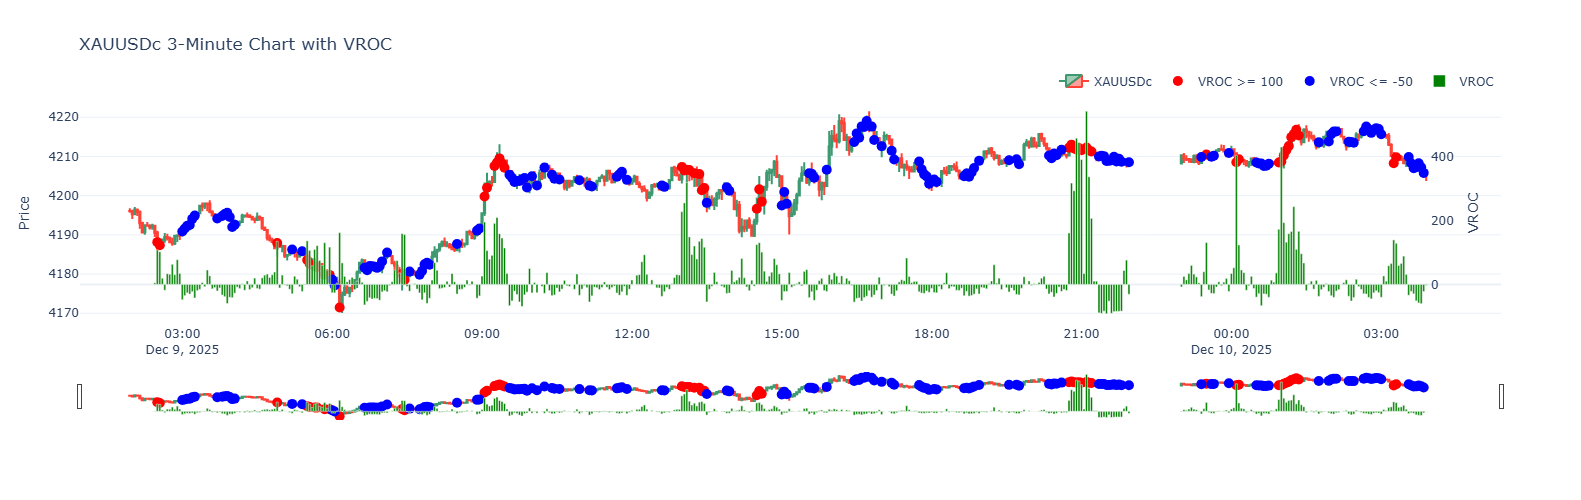

In [22]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# -------------------------
# 1. Initialize MT5
# -------------------------
if not mt5.initialize():
    print("MT5 initialization failed")
    mt5.shutdown()
    quit()

# -------------------------
# 2. Fetch 3-minute XAUUSDc data
# -------------------------
symbol = "XAUUSDc"
timeframe = mt5.TIMEFRAME_M3
bars = 500  # number of bars to fetch

utc_from = datetime.now() - timedelta(minutes=bars*3)
rates = mt5.copy_rates_from(symbol, timeframe, utc_from, bars)

# Shutdown MT5 connection
mt5.shutdown()

# -------------------------
# 3. Prepare DataFrame
# -------------------------
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')

# -------------------------
# 4. Calculate VROC
# -------------------------
vroc_period = 10
df['VROC'] = df['tick_volume'].pct_change(periods=vroc_period) * 100

# -------------------------
# 5. Identify high/low VROC bars
# -------------------------
df['VROC_positive'] = df['VROC'] >= 100  # positive spikes
df['VROC_negative'] = df['VROC'] <= -20  # negative spikes

# -------------------------
# 6. Plotly chart
# -------------------------
fig = go.Figure()

# Candlestick
fig.add_trace(go.Candlestick(
    x=df['time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='XAUUSDc'
))

# Mark candlestick closes where VROC >= 100
fig.add_trace(go.Scatter(
    x=df.loc[df['VROC_positive'], 'time'],
    y=df.loc[df['VROC_positive'], 'close'],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='VROC >= 100'
))

# Mark candlestick closes where VROC <= -50
fig.add_trace(go.Scatter(
    x=df.loc[df['VROC_negative'], 'time'],
    y=df.loc[df['VROC_negative'], 'close'],
    mode='markers',
    marker=dict(color='blue', size=10, symbol='circle'),
    name='VROC <= -50'
))

# VROC in separate pane
fig.add_trace(go.Bar(
    x=df['time'],
    y=df['VROC'],
    name='VROC',
    marker_color='green',
    yaxis='y2'
))

# Layout
fig.update_layout(
    template='plotly_white',
    width=1000,
    height=500,
    title=f'XAUUSDc 3-Minute Chart with VROC',
    xaxis=dict(domain=[0, 1]),
    yaxis=dict(title='Price'),
    yaxis2=dict(title='VROC', overlaying='y', side='right', showgrid=False, position=0.95),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()


In [17]:
import re
import pandas as pd

# =============================================================
# 1. Load the COT raw text (paste your text into cot_raw)
# =============================================================
cot_raw = r"""
Traders in Financial Futures - Futures Only Positions as of November 10, 2025                                                                              
-----------------------------------------------------------------------------------------------------------------------------------------------------------
              Dealer            :           Asset Manager/       :            Leveraged           :              Other             :     Nonreportable    :
           Intermediary         :           Institutional        :              Funds             :           Reportables          :       Positions      :
    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short   :
-----------------------------------------------------------------------------------------------------------------------------------------------------------
CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CAD 100,000)                                                                                 
CFTC Code #090741                                                    Open Interest is   289,605
Positions
   191,834     10,510        409     35,362    136,281      4,404     18,784     90,878      4,101     12,208      4,276         11     22,492     38,735
 
Changes from:       November 4, 2025                                 Total Change is:    -3,359
     4,844        825        196       -271      1,356       -150     -6,304     -7,155       -969       -809         72          6         98      2,460
 
Percent of Open Interest Represented by Each Category of Trader
      66.2        3.6        0.1       12.2       47.1        1.5        6.5       31.4        1.4        4.2        1.5        0.0        7.8       13.4
 
Number of Traders in Each Category                                    Total Traders:       135 
         9          8          4         16         31          6         15         40         10         10          6          .
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Traders in Financial Futures - Futures Only Positions as of November 10, 2025                                                                              
-----------------------------------------------------------------------------------------------------------------------------------------------------------
              Dealer            :           Asset Manager/       :            Leveraged           :              Other             :     Nonreportable    :
           Intermediary         :           Institutional        :              Funds             :           Reportables          :       Positions      :
    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short   :
-----------------------------------------------------------------------------------------------------------------------------------------------------------
SWISS FRANC - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CHF 125,000)                                                                                     
CFTC Code #092741                                                    Open Interest is    82,840
Positions
    55,971      1,228         23      5,489     50,416      1,011      6,050      9,601         79      1,400        508          0     12,817     19,974
 
Changes from:       November 4, 2025                                 Total Change is:     1,462
     2,603         -3          3        -48      2,143        -12     -1,088       -466        -46          0          0          0         50       -157
 
Percent of Open Interest Represented by Each Category of Trader
      67.6        1.5        0.0        6.6       60.9        1.2        7.3       11.6        0.1        1.7        0.6        0.0       15.5       24.1
 
Number of Traders in Each Category                                    Total Traders:        47 
        10          .          .          .         13          .          9          8          .          .          .          0
-----------------------------------------------------------------------------------------------------------------------------------------------------------|
""".strip()


# =============================================================
# 2. Split into instrument blocks
# =============================================================
# Blocks always start with:
# "Traders in Financial Futures - Futures Only Positions as of"
blocks = re.split(r"Traders in Financial Futures - Futures Only Positions as of .*?\n", cot_raw)
blocks = [b.strip() for b in blocks if b.strip()]

parsed_list = []

# =============================================================
# 3. Patterns for extracting structured values
# =============================================================
pat_instrument = re.compile(r"^(.*?EXCHANGE.*?)\s*\(", re.MULTILINE)
pat_contracts = re.compile(r"\((.*?)\)")
pat_cftc_code = re.compile(r"CFTC Code #(\d+)")
pat_open_interest = re.compile(r"Open Interest is\s+([\d,]+)")

# Table patterns (positions, changes, percentages, traders)
pat_positions = re.compile(r"Positions\s*\n(.*?)\n\n", re.DOTALL)
pat_changes = re.compile(r"Changes from:.*?\n(.*?)\n\n", re.DOTALL)
pat_percent = re.compile(r"Percent of Open Interest.*?\n(.*?)\n\n", re.DOTALL)
pat_traders = re.compile(r"Number of Traders.*?\n(.*?)\n[-]+", re.DOTALL)


# =============================================================
# 4. Helper to convert multi-column space-separated tables
# =============================================================
def parse_table_block(block_text):
    block_text = block_text.strip()
    # Split by whitespace, remove blanks
    vals = [v for v in block_text.replace("\n", " ").split(" ") if v.strip() != ""]
    # Convert ',', '.' etc
    clean = []
    for x in vals:
        if x == ".":
            clean.append(None)
        else:
            try:
                clean.append(float(x.replace(",", "")))
            except:
                clean.append(x)
    return clean


# =============================================================
# 5. Process each block
# =============================================================
for b in blocks:
    # Extract metadata
    instr = pat_instrument.search(b)
    instr_name = instr.group(1).strip() if instr else None

    contract = pat_contracts.search(b)
    contract_spec = contract.group(1).strip() if contract else None

    cftc = pat_cftc_code.search(b)
    cftc_code = cftc.group(1) if cftc else None

    oi = pat_open_interest.search(b)
    open_interest = int(oi.group(1).replace(",", "")) if oi else None

    # Extract tables
    tb_pos = pat_positions.search(b)
    tb_changes = pat_changes.search(b)
    tb_percent = pat_percent.search(b)
    tb_traders = pat_traders.search(b)

    positions = parse_table_block(tb_pos.group(1)) if tb_pos else None
    changes = parse_table_block(tb_changes.group(1)) if tb_changes else None
    percents = parse_table_block(tb_percent.group(1)) if tb_percent else None
    traders = parse_table_block(tb_traders.group(1)) if tb_traders else None

    parsed_list.append({
        "Instrument": instr_name,
        "Contract Specs": contract_spec,
        "CFTC Code": cftc_code,
        "Open Interest": open_interest,
        "Positions Raw": positions,
        "Changes Raw": changes,
        "Percents Raw": percents,
        "Traders Raw": traders,
        "Full Block": b
    })

# =============================================================
# 6. Convert into a DataFrame
# =============================================================

df = pd.DataFrame(parsed_list)

print(df)
print()
print("Columns:", df.columns.tolist())


                                      Instrument            Contract Specs  \
0  CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE  CONTRACTS OF CAD 100,000   
1      SWISS FRANC - CHICAGO MERCANTILE EXCHANGE  CONTRACTS OF CHF 125,000   

  CFTC Code  Open Interest                                      Positions Raw  \
0    090741         289605  [191834.0, 10510.0, 409.0, 35362.0, 136281.0, ...   
1    092741          82840  [55971.0, 1228.0, 23.0, 5489.0, 50416.0, 1011....   

                                         Changes Raw  \
0  [4844.0, 825.0, 196.0, -271.0, 1356.0, -150.0,...   
1  [2603.0, -3.0, 3.0, -48.0, 2143.0, -12.0, -108...   

                                        Percents Raw  \
0  [66.2, 3.6, 0.1, 12.2, 47.1, 1.5, 6.5, 31.4, 1...   
1  [67.6, 1.5, 0.0, 6.6, 60.9, 1.2, 7.3, 11.6, 0....   

                                         Traders Raw  \
0  [9.0, 8.0, 4.0, 16.0, 31.0, 6.0, 15.0, 40.0, 1...   
1  [10.0, None, None, None, 13.0, None, 9.0, 8.0,...   

              

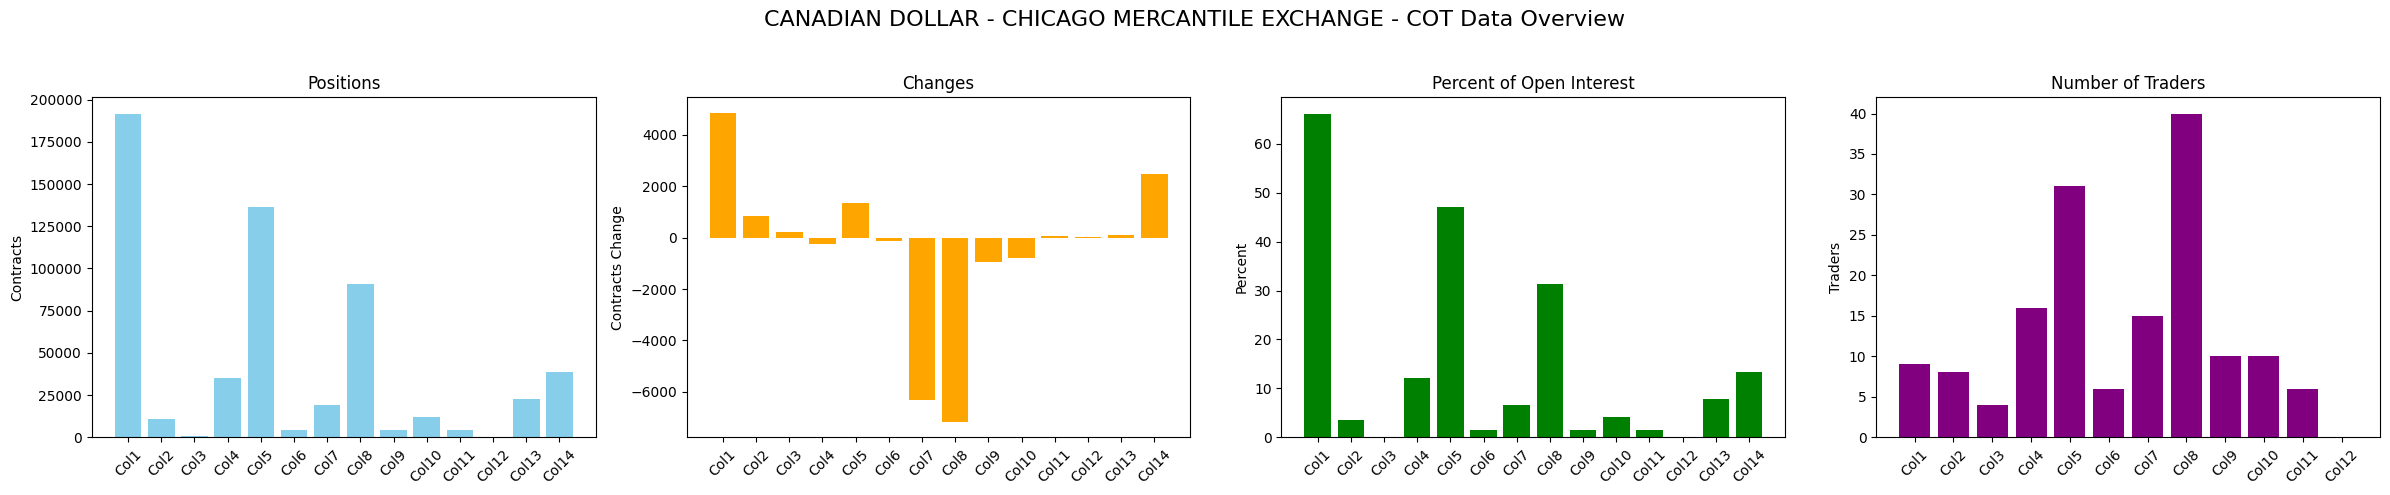

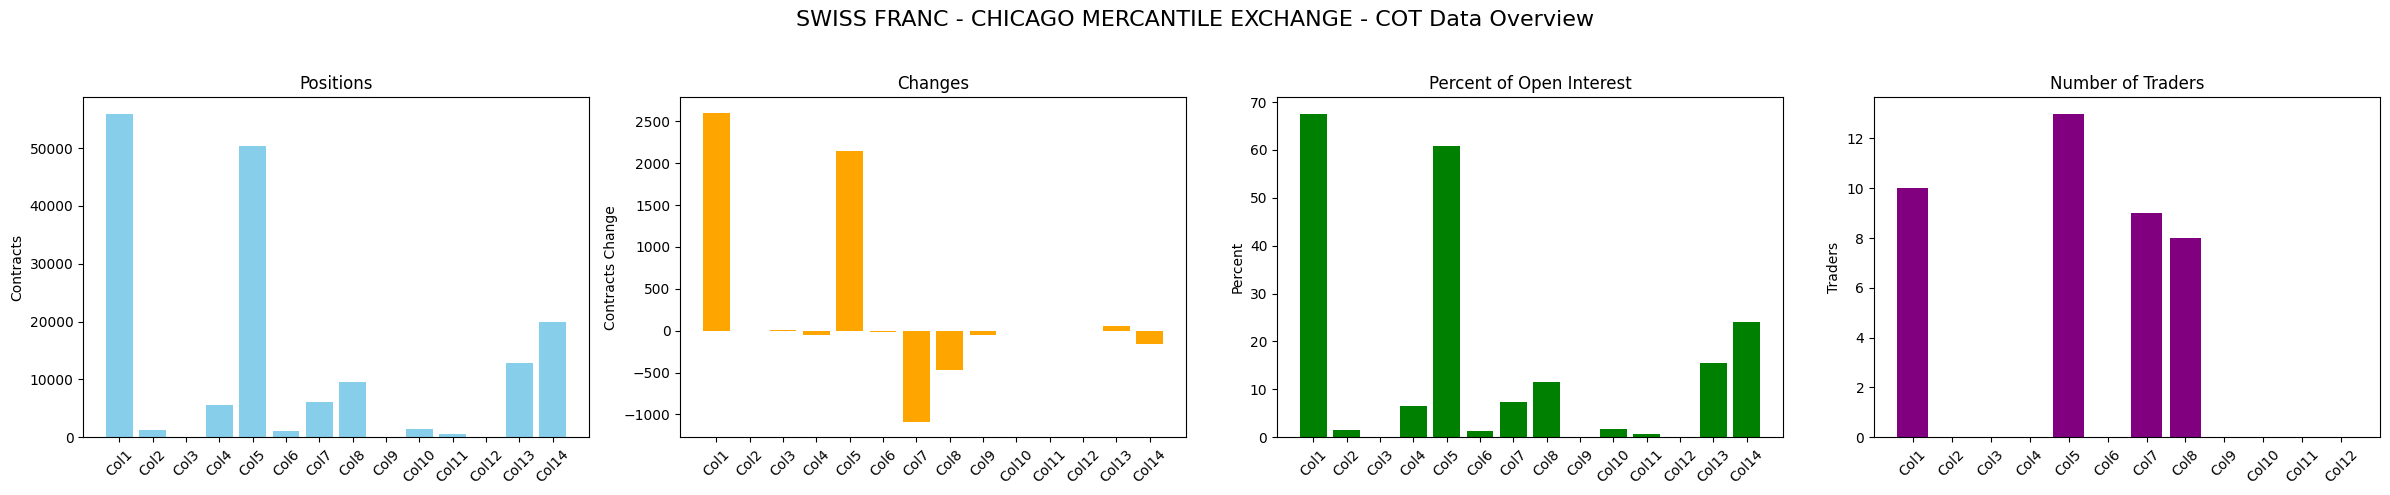

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# =============================================================
# 7. Plot raw numerical data side by side for each instrument
# =============================================================
for idx, row in df.iterrows():
    instrument = row["Instrument"]

    # Prepare data
    pos = row["Positions Raw"] if row["Positions Raw"] else []
    changes = row["Changes Raw"] if row["Changes Raw"] else []
    percents = row["Percents Raw"] if row["Percents Raw"] else []
    traders = row["Traders Raw"] if row["Traders Raw"] else []

    # Determine max length for x-axis labels for consistency
    max_len = max(len(pos), len(changes), len(percents), len(traders))
    x_labels = [f'Col{i+1}' for i in range(max_len)]

    # Create 4 subplots side by side
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))
    fig.suptitle(f'{instrument} - COT Data Overview', fontsize=16)

    # Positions
    axes[0].bar(range(len(pos)), pos, color='skyblue')
    axes[0].set_title('Positions')
    axes[0].set_xticks(range(len(pos)))
    axes[0].set_xticklabels([f'Col{i+1}' for i in range(len(pos))], rotation=45)
    axes[0].set_ylabel('Contracts')

    # Changes
    axes[1].bar(range(len(changes)), changes, color='orange')
    axes[1].set_title('Changes')
    axes[1].set_xticks(range(len(changes)))
    axes[1].set_xticklabels([f'Col{i+1}' for i in range(len(changes))], rotation=45)
    axes[1].set_ylabel('Contracts Change')

    # Percent of Open Interest
    axes[2].bar(range(len(percents)), percents, color='green')
    axes[2].set_title('Percent of Open Interest')
    axes[2].set_xticks(range(len(percents)))
    axes[2].set_xticklabels([f'Col{i+1}' for i in range(len(percents))], rotation=45)
    axes[2].set_ylabel('Percent')

    # Number of Traders
    axes[3].bar(range(len(traders)), [t if t is not None else 0 for t in traders], color='purple')
    axes[3].set_title('Number of Traders')
    axes[3].set_xticks(range(len(traders)))
    axes[3].set_xticklabels([f'Col{i+1}' for i in range(len(traders))], rotation=45)
    axes[3].set_ylabel('Traders')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
    plt.show()


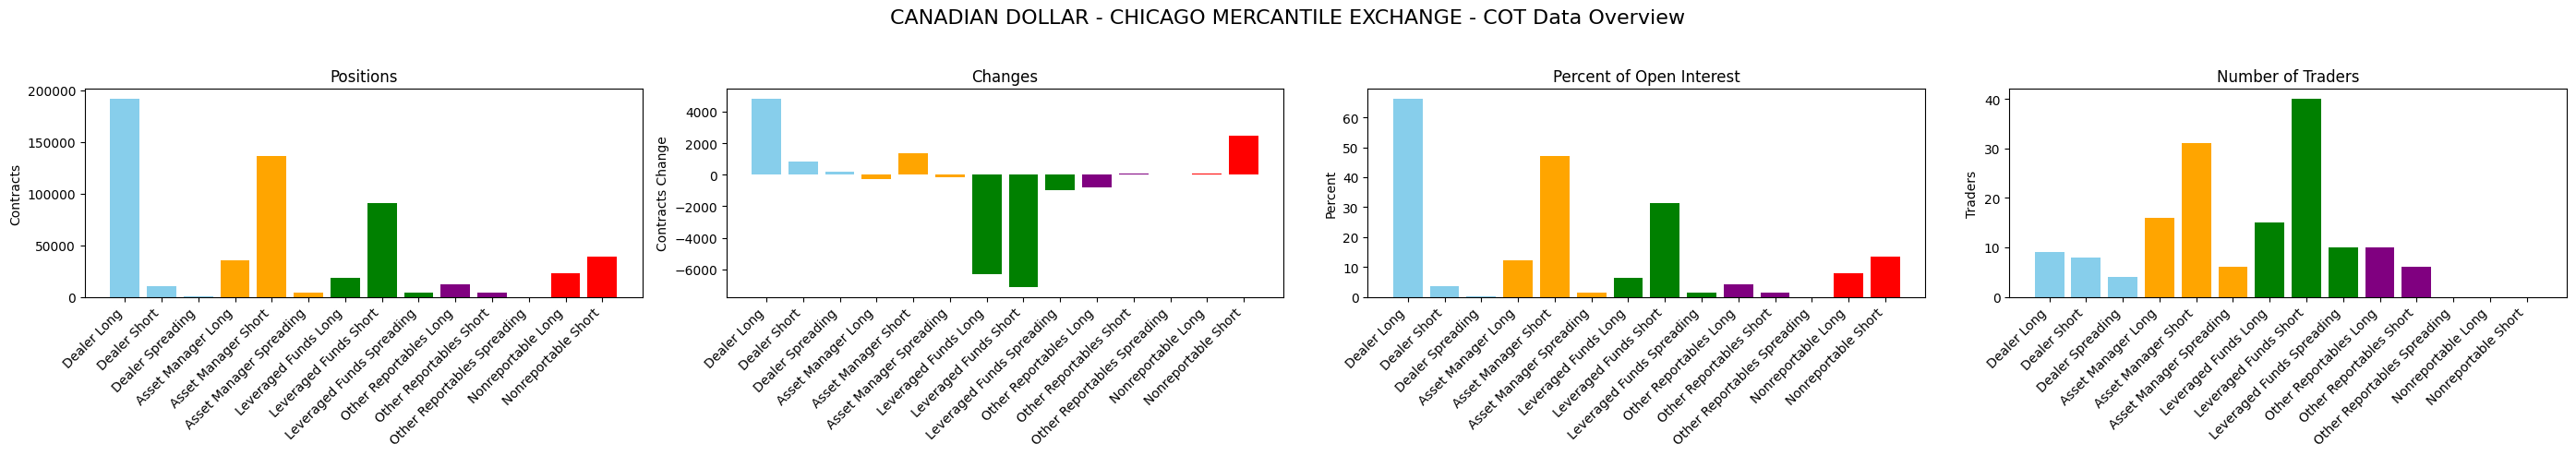

In [20]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================
# 1. Load the COT raw text (paste your text into cot_raw)
# =============================================================
cot_raw = r"""
Traders in Financial Futures - Futures Only Positions as of November 10, 2025                                                                              
-----------------------------------------------------------------------------------------------------------------------------------------------------------
              Dealer            :           Asset Manager/       :            Leveraged           :              Other             :     Nonreportable    :
           Intermediary         :           Institutional        :              Funds             :           Reportables          :       Positions      :
    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short   :
-----------------------------------------------------------------------------------------------------------------------------------------------------------
CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CAD 100,000)                                                                                 
CFTC Code #090741                                                    Open Interest is   289,605
Positions
   191,834     10,510        409     35,362    136,281      4,404     18,784     90,878      4,101     12,208      4,276         11  22,492  38,735
 
Changes from:       November 4, 2025                                 Total Change is:    -3,359
     4,844        825        196       -271      1,356       -150     -6,304     -7,155       -969       -809         72          6   98  2,460
 
Percent of Open Interest Represented by Each Category of Trader
      66.2        3.6        0.1       12.2       47.1        1.5        6.5       31.4        1.4        4.2        1.5        0.0   7.8  13.4
 
Number of Traders in Each Category                                    Total Traders:       135 
         9          8          4         16         31          6         15         40         10         10          6          .  0  0
-----------------------------------------------------------------------------------------------------------------------------------------------------------
SWISS FRANC - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CHF 125,000)                                                                                     
CFTC Code #092741                                                    Open Interest is    82,840
Positions
    55,971      1,228         23      5,489     50,416      1,011      6,050      9,601         79      1,400        508          0  12,817 19,974
 
Changes from:       November 4, 2025                                 Total Change is:     1,462
     2,603         -3          3        -48      2,143        -12     -1,088       -466        -46          0          0          0   50 -157
 
Percent of Open Interest Represented by Each Category of Trader
      67.6        1.5        0.0        6.6       60.9        1.2        7.3       11.6        0.1        1.7        0.6        0.0   15.5 24.1
 
Number of Traders in Each Category                                    Total Traders:        47 
        10          .          .          .         13          .         9          8          .          .          .          0  0 0
-----------------------------------------------------------------------------------------------------------------------------------------------------------
""".strip()


# =============================================================
# 2. Split into instrument blocks
# =============================================================
blocks = re.split(r"Traders in Financial Futures - Futures Only Positions as of .*?\n", cot_raw)
blocks = [b.strip() for b in blocks if b.strip()]

parsed_list = []

# =============================================================
# 3. Patterns for extracting structured values
# =============================================================
pat_instrument = re.compile(r"^(.*?EXCHANGE.*?)\s*\(", re.MULTILINE)
pat_contracts = re.compile(r"\((.*?)\)")
pat_cftc_code = re.compile(r"CFTC Code #(\d+)")
pat_open_interest = re.compile(r"Open Interest is\s+([\d,]+)")

pat_positions = re.compile(r"Positions\s*\n(.*?)\n\n", re.DOTALL)
pat_changes = re.compile(r"Changes from:.*?\n(.*?)\n\n", re.DOTALL)
pat_percent = re.compile(r"Percent of Open Interest.*?\n(.*?)\n\n", re.DOTALL)
pat_traders = re.compile(r"Number of Traders.*?\n(.*?)\n[-]+", re.DOTALL)


# =============================================================
# 4. Helper to parse multi-column tables
# =============================================================
def parse_table_block(block_text):
    block_text = block_text.strip()
    vals = [v for v in block_text.replace("\n", " ").split(" ") if v.strip() != ""]
    clean = []
    for x in vals:
        if x == ".":
            clean.append(None)
        else:
            try:
                clean.append(float(x.replace(",", "")))
            except:
                clean.append(x)
    return clean


# =============================================================
# 5. Process each block
# =============================================================
for b in blocks:
    instr = pat_instrument.search(b)
    instr_name = instr.group(1).strip() if instr else None

    contract = pat_contracts.search(b)
    contract_spec = contract.group(1).strip() if contract else None

    cftc = pat_cftc_code.search(b)
    cftc_code = cftc.group(1) if cftc else None

    oi = pat_open_interest.search(b)
    open_interest = int(oi.group(1).replace(",", "")) if oi else None

    tb_pos = pat_positions.search(b)
    tb_changes = pat_changes.search(b)
    tb_percent = pat_percent.search(b)
    tb_traders = pat_traders.search(b)

    positions = parse_table_block(tb_pos.group(1)) if tb_pos else None
    changes = parse_table_block(tb_changes.group(1)) if tb_changes else None
    percents = parse_table_block(tb_percent.group(1)) if tb_percent else None
    traders = parse_table_block(tb_traders.group(1)) if tb_traders else None

    parsed_list.append({
        "Instrument": instr_name,
        "Contract Specs": contract_spec,
        "CFTC Code": cftc_code,
        "Open Interest": open_interest,
        "Positions Raw": positions,
        "Changes Raw": changes,
        "Percents Raw": percents,
        "Traders Raw": traders
    })

df = pd.DataFrame(parsed_list)

# =============================================================
# 6. Plotting with proper column labels
# =============================================================
column_labels = [
    "Dealer Long", "Dealer Short", "Dealer Spreading",
    "Asset Manager Long", "Asset Manager Short", "Asset Manager Spreading",
    "Leveraged Funds Long", "Leveraged Funds Short", "Leveraged Funds Spreading",
    "Other Reportables Long", "Other Reportables Short", "Other Reportables Spreading",
    "Nonreportable Long", "Nonreportable Short"
]

# Optional colors for each trader category
colors = [
    "skyblue", "skyblue", "skyblue",          # Dealer
    "orange", "orange", "orange",            # Asset Manager
    "green", "green", "green",               # Leveraged Funds
    "purple", "purple", "purple",            # Other Reportables
    "red", "red"                              # Nonreportable
]

def pad_list(lst, length):
    return lst + [0]*(length - len(lst))

for idx, row in df.iterrows():
    instrument = row["Instrument"]
    pos = pad_list(row["Positions Raw"], len(column_labels))
    changes = pad_list(row["Changes Raw"], len(column_labels))
    percents = pad_list(row["Percents Raw"], len(column_labels))
    traders = pad_list([t if t is not None else 0 for t in row["Traders Raw"]], len(column_labels))

    fig, axes = plt.subplots(1, 4, figsize=(28, 5))
    fig.suptitle(f'{instrument} - COT Data Overview', fontsize=16)

    axes[0].bar(range(len(pos)), pos, color=colors)
    axes[0].set_title('Positions')
    axes[0].set_xticks(range(len(pos)))
    axes[0].set_xticklabels(column_labels, rotation=45, ha='right')
    axes[0].set_ylabel('Contracts')

    axes[1].bar(range(len(changes)), changes, color=colors)
    axes[1].set_title('Changes')
    axes[1].set_xticks(range(len(changes)))
    axes[1].set_xticklabels(column_labels, rotation=45, ha='right')
    axes[1].set_ylabel('Contracts Change')

    axes[2].bar(range(len(percents)), percents, color=colors)
    axes[2].set_title('Percent of Open Interest')
    axes[2].set_xticks(range(len(percents)))
    axes[2].set_xticklabels(column_labels, rotation=45, ha='right')
    axes[2].set_ylabel('Percent')

    axes[3].bar(range(len(traders)), traders, color=colors)
    axes[3].set_title('Number of Traders')
    axes[3].set_xticks(range(len(traders)))
    axes[3].set_xticklabels(column_labels, rotation=45, ha='right')
    axes[3].set_ylabel('Traders')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


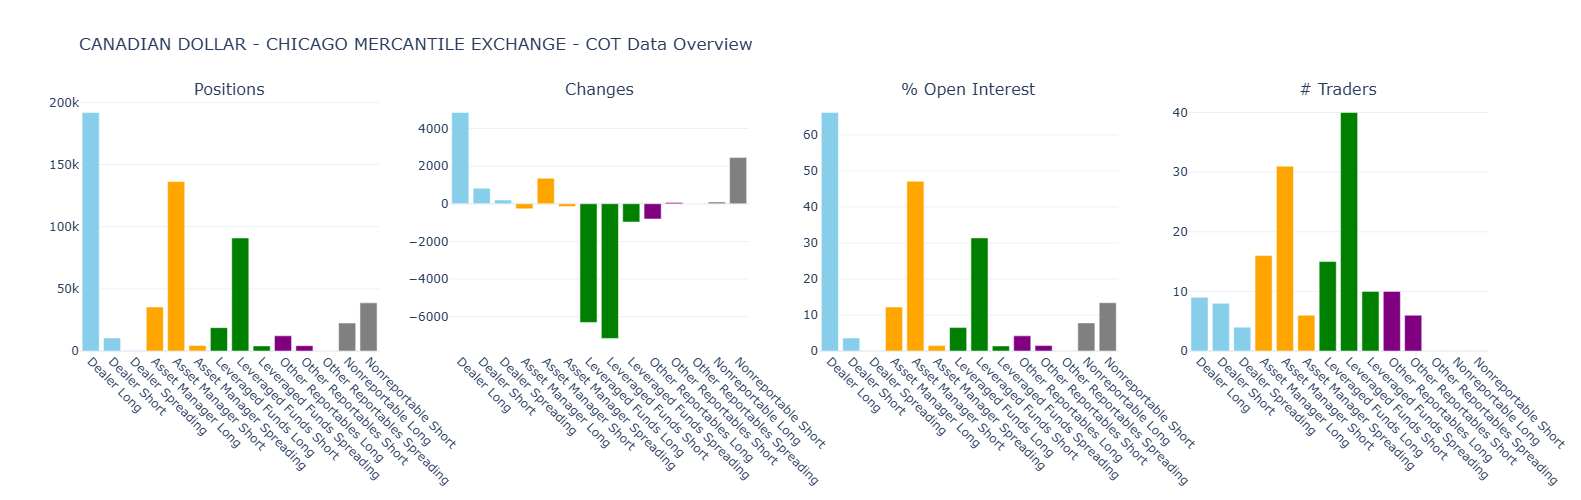

In [21]:
import re
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# =============================================================
# 1. Load the COT raw text (paste your text into cot_raw)
# =============================================================
cot_raw = r"""
Traders in Financial Futures - Futures Only Positions as of November 10, 2025                                                                              
-----------------------------------------------------------------------------------------------------------------------------------------------------------
              Dealer            :           Asset Manager/       :            Leveraged           :              Other             :     Nonreportable    :
           Intermediary         :           Institutional        :              Funds             :           Reportables          :       Positions      :
    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short  : Spreading:    Long  :   Short   :
-----------------------------------------------------------------------------------------------------------------------------------------------------------
CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CAD 100,000)                                                                                 
CFTC Code #090741                                                    Open Interest is   289,605
Positions
   191,834     10,510        409     35,362    136,281      4,404     18,784     90,878      4,101     12,208      4,276         11  22,492  38,735
 
Changes from:       November 4, 2025                                 Total Change is:    -3,359
     4,844        825        196       -271      1,356       -150     -6,304     -7,155       -969       -809         72          6       98  2,460
 
Percent of Open Interest Represented by Each Category of Trader
      66.2        3.6        0.1       12.2       47.1        1.5        6.5       31.4        1.4        4.2        1.5        0.0       7.8  13.4
 
Number of Traders in Each Category                                    Total Traders:       135 
         9          8          4         16         31          6         15         40         10         10          6          . 
-----------------------------------------------------------------------------------------------------------------------------------------------------------
SWISS FRANC - CHICAGO MERCANTILE EXCHANGE   (CONTRACTS OF CHF 125,000)                                                                                     
CFTC Code #092741                                                    Open Interest is    82,840
Positions
    55,971      1,228         23      5,489     50,416      1,011      6,050      9,601         79      1,400        508          0     12,817  19,974
 
Changes from:       November 4, 2025                                 Total Change is:     1,462
     2,603         -3        3        -48      2,143       -12     -1,088       -466       -46          0          0          0       50  -157
 
Percent of Open Interest Represented by Each Category of Trader
      67.6        1.5        0.0        6.6       60.9        1.2        7.3       11.6        0.1        1.7        0.6        0.0       15.5  24.1
 
Number of Traders in Each Category                                    Total Traders:        47 
        10          .          .          .         13          .         9          8          .          .          .          0
-----------------------------------------------------------------------------------------------------------------------------------------------------------
""".strip()


# =============================================================
# 2. Split into instrument blocks
# =============================================================
blocks = re.split(r"Traders in Financial Futures - Futures Only Positions as of .*?\n", cot_raw)
blocks = [b.strip() for b in blocks if b.strip()]

parsed_list = []

# =============================================================
# 3. Patterns for extracting structured values
# =============================================================
pat_instrument = re.compile(r"^(.*?EXCHANGE.*?)\s*\(", re.MULTILINE)
pat_contracts = re.compile(r"\((.*?)\)")
pat_cftc_code = re.compile(r"CFTC Code #(\d+)")
pat_open_interest = re.compile(r"Open Interest is\s+([\d,]+)")

pat_positions = re.compile(r"Positions\s*\n(.*?)\n\n", re.DOTALL)
pat_changes = re.compile(r"Changes from:.*?\n(.*?)\n\n", re.DOTALL)
pat_percent = re.compile(r"Percent of Open Interest.*?\n(.*?)\n\n", re.DOTALL)
pat_traders = re.compile(r"Number of Traders.*?\n(.*?)\n[-]+", re.DOTALL)


# =============================================================
# 4. Helper to convert multi-column space-separated tables
# =============================================================
def parse_table_block(block_text):
    block_text = block_text.strip()
    vals = [v for v in block_text.replace("\n", " ").split(" ") if v.strip() != ""]
    clean = []
    for x in vals:
        if x == ".":
            clean.append(None)
        else:
            try:
                clean.append(float(x.replace(",", "")))
            except:
                clean.append(x)
    return clean


# =============================================================
# 5. Process each block
# =============================================================
for b in blocks:
    instr = pat_instrument.search(b)
    instr_name = instr.group(1).strip() if instr else None

    contract = pat_contracts.search(b)
    contract_spec = contract.group(1).strip() if contract else None

    cftc = pat_cftc_code.search(b)
    cftc_code = cftc.group(1) if cftc else None

    oi = pat_open_interest.search(b)
    open_interest = int(oi.group(1).replace(",", "")) if oi else None

    tb_pos = pat_positions.search(b)
    tb_changes = pat_changes.search(b)
    tb_percent = pat_percent.search(b)
    tb_traders = pat_traders.search(b)

    positions = parse_table_block(tb_pos.group(1)) if tb_pos else None
    changes = parse_table_block(tb_changes.group(1)) if tb_changes else None
    percents = parse_table_block(tb_percent.group(1)) if tb_percent else None
    traders = parse_table_block(tb_traders.group(1)) if tb_traders else None

    parsed_list.append({
        "Instrument": instr_name,
        "Contract Specs": contract_spec,
        "CFTC Code": cftc_code,
        "Open Interest": open_interest,
        "Positions Raw": positions,
        "Changes Raw": changes,
        "Percents Raw": percents,
        "Traders Raw": traders,
        "Full Block": b
    })


# =============================================================
# 6. Convert into a DataFrame
# =============================================================
df = pd.DataFrame(parsed_list)


# =============================================================
# 7. Plot with Plotly - white theme and proper labels
# =============================================================
column_labels = [
    "Dealer Long", "Dealer Short", "Dealer Spreading",
    "Asset Manager Long", "Asset Manager Short", "Asset Manager Spreading",
    "Leveraged Funds Long", "Leveraged Funds Short", "Leveraged Funds Spreading",
    "Other Reportables Long", "Other Reportables Short", "Other Reportables Spreading",
    "Nonreportable Long", "Nonreportable Short"
]

colors = {
    "Dealer": "skyblue",
    "Asset Manager": "orange",
    "Leveraged Funds": "green",
    "Other Reportables": "purple",
    "Nonreportable": "gray"
}

def get_bar_colors(labels):
    c = []
    for l in labels:
        for key in colors.keys():
            if key in l:
                c.append(colors[key])
                break
    return c

for idx, row in df.iterrows():
    instrument = row["Instrument"]
    pos = row["Positions Raw"] if row["Positions Raw"] else []
    changes = row["Changes Raw"] if row["Changes Raw"] else []
    percents = row["Percents Raw"] if row["Percents Raw"] else []
    traders = row["Traders Raw"] if row["Traders Raw"] else []

    # Pad to 14 columns
    def pad_list(lst):
        return lst + [0]*(14 - len(lst))
    pos = pad_list(pos)
    changes = pad_list(changes)
    percents = pad_list(percents)
    traders = pad_list([t if t is not None else 0 for t in traders])

    # Colors
    bar_colors = get_bar_colors(column_labels)

    # Create subplots
    fig = make_subplots(rows=1, cols=4, subplot_titles=("Positions", "Changes", "% Open Interest", "# Traders"))

    fig.add_trace(go.Bar(x=column_labels, y=pos, marker_color=bar_colors), row=1, col=1)
    fig.add_trace(go.Bar(x=column_labels, y=changes, marker_color=bar_colors), row=1, col=2)
    fig.add_trace(go.Bar(x=column_labels, y=percents, marker_color=bar_colors), row=1, col=3)
    fig.add_trace(go.Bar(x=column_labels, y=traders, marker_color=bar_colors), row=1, col=4)

    fig.update_layout(
        title_text=f"{instrument} - COT Data Overview",
        template="plotly_white",
        height=500, width=1400,
        showlegend=False
    )

    fig.update_xaxes(tickangle=45)
    fig.show()
